In [122]:
import pandas as pd
auto_df = pd.read_csv(r'C:\Users\mo20127750\Documents\Py_Data\auto-mpg.csv')

In [132]:
auto_df['horsepower'].head(35)

0     130
1     165
2     150
3     150
4     140
5     198
6     220
7     215
8     225
9     190
10    170
11    160
12    150
13    225
14     95
15     95
16     97
17     85
18     88
19     46
20     87
21     90
22     95
23    113
24     90
25    215
26    200
27    210
28    193
29     88
30     90
31     95
32      0
33    100
34    105
Name: horsepower, dtype: int64

In [133]:
auto_df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [134]:
auto_df.shape


(398, 9)

In [135]:
#auto_df.info()
auto_df.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0         130    3504          12.0   
1  15.0          8         350.0         165    3693          11.5   
2  18.0          8         318.0         150    3436          11.0   
3  16.0          8         304.0         150    3433          12.0   
4  17.0          8         302.0         140    3449          10.5   

   model year  origin                   car name  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1              amc rebel sst  
4          70       1                ford torino

In [136]:
auto_df['car name']

0              chevrolet chevelle malibu
1                      buick skylark 320
2                     plymouth satellite
3                          amc rebel sst
4                            ford torino
5                       ford galaxie 500
6                       chevrolet impala
7                      plymouth fury iii
8                       pontiac catalina
9                     amc ambassador dpl
10                   dodge challenger se
11                    plymouth 'cuda 340
12                 chevrolet monte carlo
13               buick estate wagon (sw)
14                 toyota corona mark ii
15                       plymouth duster
16                            amc hornet
17                         ford maverick
18                          datsun pl510
19          volkswagen 1131 deluxe sedan
20                           peugeot 504
21                           audi 100 ls
22                              saab 99e
23                              bmw 2002
24              

In [137]:
auto_df.describe()

mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  398.000000   398.000000   
mean    23.514573    5.454774    193.425879  102.894472  2970.424623   
std      7.815984    1.701004    104.269838   40.269544   846.841774   
min      9.000000    3.000000     68.000000    0.000000  1613.000000   
25%     17.500000    4.000000    104.250000   75.000000  2223.750000   
50%     23.000000    4.000000    148.500000   92.000000  2803.500000   
75%     29.000000    8.000000    262.000000  125.000000  3608.000000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model year      origin  
count    398.000000  398.000000  398.000000  
mean      15.568090   76.010050    1.572864  
std        2.757689    3.697627    0.802055  
min        8.000000   70.000000    1.000000  
25%       13.825000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       17.175000   79.000000    2.000000  
max       24.800000   82.000000    3.000000

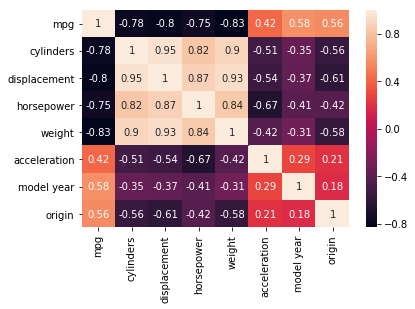

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(auto_df.corr(),annot=True)
plt.show()

In [139]:
# model without dropped coorelated variables
auto_df['car name'].value_counts()

ford pinto                           6
amc matador                          5
toyota corolla                       5
ford maverick                        5
chevrolet chevette                   4
amc gremlin                          4
peugeot 504                          4
amc hornet                           4
chevrolet impala                     4
toyota corona                        4
dodge colt                           3
ford galaxie 500                     3
plymouth duster                      3
chevrolet nova                       3
honda civic                          3
ford gran torino                     3
chevrolet caprice classic            3
chevrolet vega                       3
pontiac catalina                     3
volkswagen dasher                    3
plymouth fury iii                    3
chevrolet citation                   3
chevrolet chevelle malibu            2
buick estate wagon (sw)              2
amc matador (sw)                     2
saab 99le                

In [140]:
auto_df['car name'] = auto_df['car name'].astype('category')
auto_df['car name'] = auto_df['car name'].cat.codes

In [141]:
auto_df.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0         130    3504          12.0   
1  15.0          8         350.0         165    3693          11.5   
2  18.0          8         318.0         150    3436          11.0   
3  16.0          8         304.0         150    3433          12.0   
4  17.0          8         302.0         140    3449          10.5   

   model year  origin  car name  
0          70       1        49  
1          70       1        36  
2          70       1       231  
3          70       1        14  
4          70       1       161

In [142]:
auto_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name          int16
dtype: object

In [143]:
data_without_qmar = auto_df[auto_df.horsepower != "?"]

In [144]:
data_without_qmar.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name          int16
dtype: object

In [145]:
data_without_qmar.horsepower = data_without_qmar.horsepower.astype('float')

In [146]:
# scaling
def scale(a):
    b = (a-a.min())/(a.max()-a.min())
    return b


In [147]:
data_to_scale = data_without_qmar.copy()

In [148]:
data_to_scale['displacement'] = scale(data_to_scale['displacement'])
data_to_scale['horsepower'] = scale(data_to_scale['horsepower'])
data_to_scale['acceleration'] = scale(data_to_scale['acceleration'])
data_to_scale['weight'] = scale(data_to_scale['weight'])
data_to_scale['mpg'] = scale(data_to_scale['mpg'])

In [149]:
import numpy as np
#from sklearn.impute import SimpleImputer


X = data_to_scale.drop(['mpg'],axis=1)
Y = data_to_scale.mpg


In [153]:
Y.shape

(398,)

In [154]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=0)
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [155]:
predictions = lr.predict(X_test)

In [157]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from math import sqrt
our_score = r2_score(y_test, predictions)
print(our_score)

0.8179195690344263


In [158]:
rmse = sqrt(mean_squared_error(y_true=y_test,y_pred=predictions))
rmse

0.09040341636607298

In [159]:
data_needed =  data_without_qmar.loc[:,['mpg','displacement']]


In [183]:
from scipy.stats import zscore
data_needed = data_needed.apply(zscore)

In [184]:
def compute_MSE(points,m,c):
    totalerr = 0;
    for i in range(0,len(points)):
        x = points[i,1]
        y = points[i,0]
        totalerr+=(y-(m*x + c))**2
    return (totalerr/float(len(points)))

In [192]:
def step_gradient(points, m_curr, c_curr, learning_rate):
    m_grad=0
    c_grad=0
    n=float(len(points))
    for i in range(0,len(points)):
        x = points[i,1]
        y = points[i,0]
        m_grad+= -(2/n)*(y-(m_curr*x+c_curr))*x
        c_grad+= -(2/n)*(y-(m_curr*x+c_curr))*x
        m_new = m_curr - (learning_rate * m_grad)
        c_new = c_curr - (learning_rate * c_grad)
    return (m_new, c_new)

In [193]:
def iteration(points,m,c,lrnrt,iteration_num):
    for i in range(iteration_num):
        m,c = step_gradient(points,m,c,lrnrt)
    return(m,c)

In [194]:
points=np.array(data_needed)

In [195]:
points[0,0]

-0.706438700650983

In [196]:
m_ini = 0
c_ini = 0
iterations  =1000
learning_rt = 0.0001

In [197]:
print('Starting gradient descent at m = {0}, c={1} with MSE = {2}'.format(m_ini,c_ini,compute_MSE(points,m_ini,c_ini)))

Starting gradient descent at m = 0, c=0 with MSE = 0.999999999999999


In [198]:
[m,c]=iteration(points,m_ini,c_ini,learning_rt,iterations)

In [199]:
print(m,c)

-0.14579041056115793 -0.14579041056115793


In [200]:
print('After {0} iteration, m= {1}, c = {2} and MSE = {3}'.format(iterations,m,c,compute_MSE(points,m,c)))

After 1000 iteration, m= -0.14579041056115793, c = -0.14579041056115793 and MSE = 0.8080195676173924


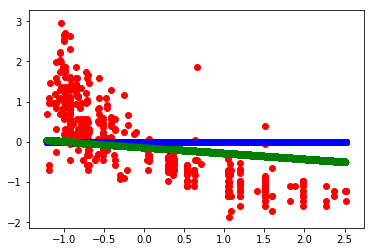

In [206]:
for i in range(0,len(points)):
    x=points[i,1]
    y=points[i,0]
    plt.scatter(x,y,color='red')
               
    plt.plot(data_needed.displacement,(0*data_needed.displacement+0),color='blue',linewidth=7)
    
    plt.plot(data_needed.displacement,(-0.14579041056115793*data_needed.displacement+-0.14579041056115793),color='g',linewidth=7)

    

In [211]:
iterations = 2000
[m,c]=iteration(points,m_ini,c_ini,learning_rt,iterations)

In [214]:
print('After {0} iterations, m={1}, c={2} and MSE = {3}'.format(iterations,m,c,compute_MSE(points,m,c)))

After 2000 iterations, m=-0.2651511156351198, c=-0.2651511156351198 and MSE = 0.7141396758566999


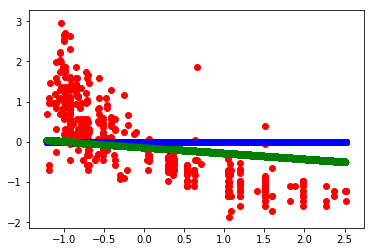

In [219]:
for i in range(0,len(points)):
     x = points[i,1]
     y = points[i,0]
     plt.scatter(x,y,color='red')
    
     plt.plot(data_needed.displacement,(0*data_needed.displacement+0),color='blue',linewidth=7)
    
     plt.plot(data_needed.displacement,(-0.14579041056115793*data_needed.displacement+-0.14579041056115793),color='g',linewidth=7)
    
plt.show()

In [218]:
iterations = 2000
learning_rt = 0.01
[m,c]=iteration(points,m_ini,c_ini,learning_rt,iterations)

In [220]:
print('After {0} iterations, m={1}, c={2} and MSE = {3}'.format(iterations,m,c,compute_MSE(points,m,c)))

After 2000 iterations, m=-0.8042028248058953, c=-0.8042028248058953 and MSE = 0.999999999999996


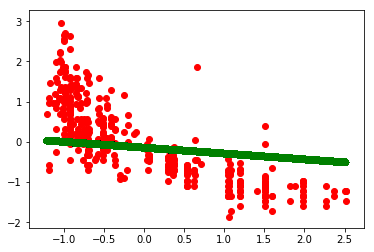

In [221]:
for i in range(0,len(points)):
     x = points[i,1]
     y = points[i,0]
     plt.scatter(x,y,color='red')
    
     #plt.plot(data_needed.displacement,(0*data_needed.displacement+0),color='blue',linewidth=7)
    
     plt.plot(data_needed.displacement,(-0.14579041056115793*data_needed.displacement+-0.14579041056115793),color='g',linewidth=7)
    
plt.show()